<a href="https://colab.research.google.com/github/Khizer-Data/uav-cyber-intrusion-detection/blob/main/UAV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
df = pd.read_csv('Dataset_T-ITS.csv')

/tmp/ipython-input-162-1390387449.py:1: DtypeWarning: Columns (35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Dataset_T-ITS.csv')


In [163]:
df_one= df.iloc[0:9425].copy()

In [164]:
df_two= df.iloc[9425:13717].copy()

In [165]:
df_two.columns = df.iloc[9425]

In [166]:
df_one.tail()

,timestamp_c,frame.number,frame.len,frame.protocols,wlan.duration,wlan.ra,wlan.ta,wlan.da,wlan.sa,wlan.bssid,...,tcp.options,udp.srcport,udp.dstport,udp.length,data.data,data.len,wlan.fc.type,wlan.fc.subtype,time_since_last_packet,class
9420,54392.31069,913,26,0,60,1,0,1,0,0,...,0,0,0,0,0,0,2,12,0.095652,benign
9421,54392.31704,915,238,2,44,0,1,0,1,0,...,0,8889,8890,184,3,176,2,8,0.006341,benign
9422,54392.31747,917,238,2,44,0,1,0,1,0,...,0,8889,8890,184,3,176,2,8,0.000433,benign
9423,54392.41309,919,26,0,60,1,0,1,0,0,...,0,0,0,0,0,0,2,12,0.095618,benign
9424,54392.41903,921,238,2,44,0,1,0,1,0,...,0,8889,8890,184,5,176,2,8,0.00594,benign


In [167]:
df_one.shape

(9425, 38)

In [168]:
df_two.shape

(4292, 38)

In [169]:
df_two.tail()

9425,timestamp_p,height,x_speed,y_speed,z_speed,pitch,roll,yaw,temperature,distance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13712,54383.61562,70,0,0,3,0,0,34,65,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13713,54384.15617,50,0,0,4,0,0,34,65,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13714,54384.68675,20,0,0,4,0,0,34,65,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13715,54385.24152,0,0,0,3,-1,0,34,65,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13716,timestamp_c,frame.number,frame.len,frame.protocols,wlan.duration,wlan.ra,wlan.ta,wlan.da,wlan.sa,wlan.bssid,...,tcp.options,udp.srcport,udp.dstport,udp.length,data.data,data.len,wlan.fc.type,wlan.fc.subtype,time_since_last_packet,class


In [170]:
df_two.drop(df_two.index[0], inplace=True)

In [171]:
df_two.drop(df_two.index[-1], inplace=True)

In [172]:
df_two.tail()

9425,timestamp_p,height,x_speed,y_speed,z_speed,pitch,roll,yaw,temperature,distance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13711,54383.08663,80,0,0,0,0,0,34,65,79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13712,54383.61562,70,0,0,3,0,0,34,65,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13713,54384.15617,50,0,0,4,0,0,34,65,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13714,54384.68675,20,0,0,4,0,0,34,65,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13715,54385.24152,0,0,0,3,-1,0,34,65,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
df_two.head()

9425,timestamp_p,height,x_speed,y_speed,z_speed,pitch,roll,yaw,temperature,distance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9426,28123.02875,80,0,0,0,0,0,0,68,84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9427,28123.55962,80,0,0,0,0,0,0,68,84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9428,28124.0769,80,0,0,0,0,0,0,68,83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9429,28124.602,80,0,0,0,-1,0,0,67,83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9430,28125.1291,80,0,0,0,-1,0,0,67,85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54783 entries, 0 to 54782
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   timestamp_c             54783 non-null  object
 1   frame.number            54783 non-null  object
 2   frame.len               54783 non-null  object
 3   frame.protocols         54783 non-null  object
 4   wlan.duration           54783 non-null  object
 5   wlan.ra                 54783 non-null  object
 6   wlan.ta                 54783 non-null  object
 7   wlan.da                 54783 non-null  object
 8   wlan.sa                 54783 non-null  object
 9   wlan.bssid              54783 non-null  object
 10  wlan.frag               54783 non-null  object
 11  wlan.seq                54783 non-null  object
 12  llc.type                54783 non-null  object
 13  ip.hdr_len              54783 non-null  object
 14  ip.len                  54783 non-null  object
 15  ip

In [175]:
df_two = df_two.iloc[:, :17]

In [176]:
df_two.head()

9425,timestamp_p,height,x_speed,y_speed,z_speed,pitch,roll,yaw,temperature,distance,barometer,flight_time,battery,mp_distance_x,mp_distance_y,mp_distance_z,class
9426,28123.02875,80,0,0,0,0,0,0,68,84,19309,7,65,-15,-5,86,benign
9427,28123.55962,80,0,0,0,0,0,0,68,84,19305,7,65,-13,-6,86,benign
9428,28124.0769,80,0,0,0,0,0,0,68,83,19303,8,65,-18,-6,85,benign
9429,28124.602,80,0,0,0,-1,0,0,67,83,19307,8,65,-21,-9,84,benign
9430,28125.1291,80,0,0,0,-1,0,0,67,85,19309,9,65,-24,-10,84,benign


In [177]:
df_two.shape

(4290, 17)

In [178]:
df_three = df.iloc[13717:38369].copy()
df_three.tail()

,timestamp_c,frame.number,frame.len,frame.protocols,wlan.duration,wlan.ra,wlan.ta,wlan.da,wlan.sa,wlan.bssid,...,tcp.options,udp.srcport,udp.dstport,udp.length,data.data,data.len,wlan.fc.type,wlan.fc.subtype,time_since_last_packet,class
38364,17005.8655,3369,26,0,162,1,2,1,2,0,...,0,0,0,0,0,0,2,12.0,0.000006,Replay
38365,17005.90378,3371,75,2,44,0,1,0,1,0,...,0,8889,8899,21,72,13,2,8.0,0.038278,Replay
38366,17005.95553,3373,236,2,44,0,1,0,1,0,...,0,8889,8890,182,26,174,2,8.0,0.051746,Replay
38367,17005.966,3375,26,0,60,1,0,1,0,0,...,0,0,0,0,0,0,2,12.0,0.010474,Replay
38368,17005.96603,3377,26,0,162,1,2,1,2,0,...,0,0,0,0,0,0,2,12.0,0.000025,Replay


In [179]:
df_four = df.iloc[38369:39343].copy()
df_four.head()

,timestamp_c,frame.number,frame.len,frame.protocols,wlan.duration,wlan.ra,wlan.ta,wlan.da,wlan.sa,wlan.bssid,...,tcp.options,udp.srcport,udp.dstport,udp.length,data.data,data.len,wlan.fc.type,wlan.fc.subtype,time_since_last_packet,class
38369,timestamp_p,height,x_speed,y_speed,z_speed,pitch,roll,yaw,temperature,distance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38370,27674.61548,60,2,0,0,-2,-1,0,67,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38371,27675.14112,60,2,0,0,-1,-1,0,67,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38372,27675.68571,60,1,-1,0,-1,-1,0,67,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38373,27676.20432,60,0,0,0,0,0,0,67,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
df_four.columns = df.iloc[38369]

In [181]:
df_four.drop(df_four.index[0], inplace=True)

In [182]:
df_four = df_four.iloc[:, :17]

In [183]:
df_four.head()

38369,timestamp_p,height,x_speed,y_speed,z_speed,pitch,roll,yaw,temperature,distance,barometer,flight_time,battery,mp_distance_x,mp_distance_y,mp_distance_z,class
38370,27674.61548,60,2,0,0,-2,-1,0,67,81,14438,27,77,-43,25,79,Replay
38371,27675.14112,60,2,0,0,-1,-1,0,67,81,14438,28,77,-43,-9,81,Replay
38372,27675.68571,60,1,-1,0,-1,-1,0,67,81,14432,29,77,-33,2,81,Replay
38373,27676.20432,60,0,0,0,0,0,0,67,81,14441,29,77,-28,4,80,Replay
38374,27676.72003,60,2,0,0,-2,-1,0,67,81,14444,30,77,-24,1,81,Replay


In [184]:
df_one.head()

,timestamp_c,frame.number,frame.len,frame.protocols,wlan.duration,wlan.ra,wlan.ta,wlan.da,wlan.sa,wlan.bssid,...,tcp.options,udp.srcport,udp.dstport,udp.length,data.data,data.len,wlan.fc.type,wlan.fc.subtype,time_since_last_packet,class
0,28105.9752,60,24,0,0,1,1,1,1,0,...,0,0,0,0,0,0,2,4,0,benign
1,28105.9755,61,24,0,0,1,1,1,1,0,...,0,0,0,0,0,0,2,4,0.000298,benign
2,28107.09931,75,104,0,0,4,1,4,1,0,...,0,0,0,0,0,0,0,8,1.123815,benign
3,28114.7857,122,86,2,44,1,0,1,0,0,...,1,0,0,0,0,0,2,8,7.686387,benign
4,28114.88188,124,26,0,60,1,0,1,0,0,...,0,0,0,0,0,0,2,12,0.096183,benign


In [185]:
df_two.head()

9425,timestamp_p,height,x_speed,y_speed,z_speed,pitch,roll,yaw,temperature,distance,barometer,flight_time,battery,mp_distance_x,mp_distance_y,mp_distance_z,class
9426,28123.02875,80,0,0,0,0,0,0,68,84,19309,7,65,-15,-5,86,benign
9427,28123.55962,80,0,0,0,0,0,0,68,84,19305,7,65,-13,-6,86,benign
9428,28124.0769,80,0,0,0,0,0,0,68,83,19303,8,65,-18,-6,85,benign
9429,28124.602,80,0,0,0,-1,0,0,67,83,19307,8,65,-21,-9,84,benign
9430,28125.1291,80,0,0,0,-1,0,0,67,85,19309,9,65,-24,-10,84,benign


In [186]:
df_three.head()

,timestamp_c,frame.number,frame.len,frame.protocols,wlan.duration,wlan.ra,wlan.ta,wlan.da,wlan.sa,wlan.bssid,...,tcp.options,udp.srcport,udp.dstport,udp.length,data.data,data.len,wlan.fc.type,wlan.fc.subtype,time_since_last_packet,class
13717,22568.17554,54,104,0,0,2,1,2,1,0,...,0,0,0,0,0,0,0,8,0,DoS attack
13718,22572.52353,70,98,0,320,0,1,0,1,0,...,0,0,0,0,0,0,0,5,4.347987,DoS attack
13719,22572.54732,72,98,0,320,0,1,0,1,0,...,0,0,0,0,0,0,0,5,0.023789,DoS attack
13720,22572.54859,73,98,0,320,0,1,0,1,0,...,0,0,0,0,0,0,0,5,0.001278,DoS attack
13721,22600.27325,572,30,0,314,1,0,1,0,0,...,0,0,0,0,0,0,0,11,27.72466,DoS attack


In [187]:
df_four.head()

38369,timestamp_p,height,x_speed,y_speed,z_speed,pitch,roll,yaw,temperature,distance,barometer,flight_time,battery,mp_distance_x,mp_distance_y,mp_distance_z,class
38370,27674.61548,60,2,0,0,-2,-1,0,67,81,14438,27,77,-43,25,79,Replay
38371,27675.14112,60,2,0,0,-1,-1,0,67,81,14438,28,77,-43,-9,81,Replay
38372,27675.68571,60,1,-1,0,-1,-1,0,67,81,14432,29,77,-33,2,81,Replay
38373,27676.20432,60,0,0,0,0,0,0,67,81,14441,29,77,-28,4,80,Replay
38374,27676.72003,60,2,0,0,-2,-1,0,67,81,14444,30,77,-24,1,81,Replay


In [188]:
df_five = df.iloc[39343:45027].copy()
df_five.head()


,timestamp_c,frame.number,frame.len,frame.protocols,wlan.duration,wlan.ra,wlan.ta,wlan.da,wlan.sa,wlan.bssid,...,tcp.options,udp.srcport,udp.dstport,udp.length,data.data,data.len,wlan.fc.type,wlan.fc.subtype,time_since_last_packet,class
39343,timestamp_c,frame.number,frame.len,wlan.ta,wlan.sa,wlan.ra,wlan.da,wlan.bssid,wlan.duration,wlan.frag,...,wlan_radio.channel,wlan_radio.frequency,wlan_radio.signal_strength (dbm),wlan_radio.Noise level (dbm),wlan_radio.SNR (db),wlan_radio.preamble,class,NaN,NaN,NaN
39344,1683996559,3,293,0,1,1,0,0,44,0,...,6,2437,0,0,0,20,evil_twin,NaN,NaN,NaN
39345,1683996559,12,295,0,1,1,0,0,44,0,...,6,2437,0,0,0,20,evil_twin,NaN,NaN,NaN
39346,1683996559,18,294,0,1,1,0,0,44,0,...,6,2437,0,0,0,20,evil_twin,NaN,NaN,NaN
39347,1683996559,30,294,0,1,1,0,0,44,0,...,6,2437,0,0,0,20,evil_twin,NaN,NaN,NaN


In [189]:
df_five.columns = df.iloc[39343]

In [190]:
df_five.drop(df_five.index[0], inplace=True)

In [191]:
df_five = df_five.iloc[:, :35]

In [192]:
df_five.head()

39343,timestamp_c,frame.number,frame.len,wlan.ta,wlan.sa,wlan.ra,wlan.da,wlan.bssid,wlan.duration,wlan.frag,...,radiotap.channel.flags.ofdm,radiotap.channel.flags.cck,wlan_radio.datarate,wlan_radio.channel,wlan_radio.frequency,wlan_radio.signal_strength (dbm),wlan_radio.Noise level (dbm),wlan_radio.SNR (db),wlan_radio.preamble,class
39344,1683996559,3,293,0,1,1,0,0,44,0,...,1,0,54,6,2437,0,0,0,20,evil_twin
39345,1683996559,12,295,0,1,1,0,0,44,0,...,1,0,54,6,2437,0,0,0,20,evil_twin
39346,1683996559,18,294,0,1,1,0,0,44,0,...,1,0,54,6,2437,0,0,0,20,evil_twin
39347,1683996559,30,294,0,1,1,0,0,44,0,...,1,0,54,6,2437,0,0,0,20,evil_twin
39348,1683996559,42,294,0,1,1,0,0,44,0,...,1,0,54,6,2437,0,0,0,20,evil_twin


In [193]:
df_five.shape

(5683, 35)

In [194]:
df_six = df.iloc[45027:50501].copy()
df_six.head()

,timestamp_c,frame.number,frame.len,frame.protocols,wlan.duration,wlan.ra,wlan.ta,wlan.da,wlan.sa,wlan.bssid,...,tcp.options,udp.srcport,udp.dstport,udp.length,data.data,data.len,wlan.fc.type,wlan.fc.subtype,time_since_last_packet,class
45027,timestamp_p,mid,x,y,z,pitch,roll,yaw,vgx,vgy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45028,1683982117,-1,-100,-100,-100,0,0,-173,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45029,1683982117,-1,-100,-100,-100,0,0,-173,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45030,1683982118,-1,-100,-100,-100,0,0,-173,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45031,1683982118,-1,-100,-100,-100,0,0,-173,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
df_six.columns = df.iloc[45027]

In [196]:
df_six.drop(df_six.index[0], inplace=True)

In [197]:
df_six = df_six.iloc[:, :22]

In [198]:
df_six.head()

45027,timestamp_p,mid,x,y,z,pitch,roll,yaw,vgx,vgy,...,temph,tof,h,bat,baro,time,agx,agy,agz,class
45028,1683982117,-1,-100,-100,-100,0,0,-173,0,0,...,64,159,130,57,286.32,78,13,-6,-1001,evil_twin
45029,1683982117,-1,-100,-100,-100,0,0,-173,0,0,...,65,159,130,57,286.34,78,4,-7,-993,evil_twin
45030,1683982118,-1,-100,-100,-100,0,0,-173,0,0,...,65,159,130,57,286.34,78,4,-7,-993,evil_twin
45031,1683982118,-1,-100,-100,-100,0,0,-173,0,0,...,65,159,130,57,286.34,78,15,-8,-1004,evil_twin
45032,1683982118,-1,-100,-100,-100,0,0,-173,0,0,...,65,158,130,57,286.34,78,24,-12,-1003,evil_twin


In [199]:
df_six.shape

(5473, 22)

In [200]:
df_seven = df.iloc[50501:53975].copy()
df_seven.head()

,timestamp_c,frame.number,frame.len,frame.protocols,wlan.duration,wlan.ra,wlan.ta,wlan.da,wlan.sa,wlan.bssid,...,tcp.options,udp.srcport,udp.dstport,udp.length,data.data,data.len,wlan.fc.type,wlan.fc.subtype,time_since_last_packet,class
50501,timestamp_c,frame.number,frame.len,wlan.ta,wlan.sa,wlan.ra,wlan.da,wlan.bssid,wlan.duration,wlan.frag,...,wlan_radio.channel,wlan_radio.frequency,wlan_radio.signal_strength (dbm),wlan_radio.Noise level (dbm),wlan_radio.SNR (db),wlan_radio.preamble,class,NaN,NaN,NaN
50502,1693963539,1,140,0,0,41,41,0,0,0,...,2,2417,-86,0,0,192,FDI,NaN,NaN,NaN
50503,1693963539,3,134,0,0,15,15,0,320,0,...,2,2417,-68,0,0,192,FDI,NaN,NaN,NaN
50504,1693963539,4,134,0,0,15,15,0,320,0,...,2,2417,-78,0,0,192,FDI,NaN,NaN,NaN
50505,1693963539,5,134,0,0,15,15,0,320,0,...,2,2417,-78,0,0,192,FDI,NaN,NaN,NaN


In [201]:
df_seven.columns = df.iloc[50501]

In [202]:
df_seven.drop(df_seven.index[0], inplace=True)

In [203]:
df_seven = df_seven.iloc[:, :35]

In [204]:
df_seven.head()

50501,timestamp_c,frame.number,frame.len,wlan.ta,wlan.sa,wlan.ra,wlan.da,wlan.bssid,wlan.duration,wlan.frag,...,radiotap.channel.flags.ofdm,radiotap.channel.flags.cck,wlan_radio.datarate,wlan_radio.channel,wlan_radio.frequency,wlan_radio.signal_strength (dbm),wlan_radio.Noise level (dbm),wlan_radio.SNR (db),wlan_radio.preamble,class
50502,1693963539,1,140,0,0,41,41,0,0,0,...,0,1,1,2,2417,-86,0,0,192,FDI
50503,1693963539,3,134,0,0,15,15,0,320,0,...,0,1,1,2,2417,-68,0,0,192,FDI
50504,1693963539,4,134,0,0,15,15,0,320,0,...,0,1,1,2,2417,-78,0,0,192,FDI
50505,1693963539,5,134,0,0,15,15,0,320,0,...,0,1,1,2,2417,-78,0,0,192,FDI
50506,1693963539,6,60,2,2,8,8,0,344,0,...,1,0,24,2,2417,-32,0,0,20,FDI


In [205]:
df_seven.shape

(3473, 35)

In [206]:
df_eight = df.iloc[53975:].copy()
df_eight.head()

,timestamp_c,frame.number,frame.len,frame.protocols,wlan.duration,wlan.ra,wlan.ta,wlan.da,wlan.sa,wlan.bssid,...,tcp.options,udp.srcport,udp.dstport,udp.length,data.data,data.len,wlan.fc.type,wlan.fc.subtype,time_since_last_packet,class
53975,mid,x,y,z,mpitch,mroll,myaw,pitch,roll,yaw,...,residual2,residual3,residual4,class,NaN,NaN,NaN,NaN,NaN,NaN
53976,12,134,-2,80,0,176,-179,0,0,61,...,-2,134,-2,FDI,NaN,NaN,NaN,NaN,NaN,NaN
53977,12,-3,-12,102,0,176,-179,0,0,61,...,-9.413793103,-121.0842912,-10.23754789,FDI,NaN,NaN,NaN,NaN,NaN,NaN
53978,12,-6,-9,104,-4,176,-178,-1,-1,61,...,7.225581944,0.751658432,3.583962361,FDI,NaN,NaN,NaN,NaN,NaN,NaN
53979,12,-6,-9,104,-4,176,-178,0,0,61,...,5.612189899,16.4135381,1.114305783,FDI,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
df_eight.columns = df.iloc[53975]

In [208]:
df_eight.drop(df_eight.index[0], inplace=True)

In [209]:
df_eight = df_eight.iloc[:, :32]

In [210]:
df_eight.head()

53975,mid,x,y,z,mpitch,mroll,myaw,pitch,roll,yaw,...,agz,est_x,est_y,cntl_x,cntl_y,residual1,residual2,residual3,residual4,class
53976,12,134,-2,80,0,176,-179,0,0,61,...,-1027,115.5172414,-1.724137931,-18.34482759,-7.917241379,134,-2,134,-2,FDI
53977,12,-3,-12,102,0,176,-179,0,0,61,...,-953,9.840284153,-10.87591743,12.55506526,-4.78922588,-176.2758621,-9.413793103,-121.0842912,-10.23754789,FDI
53978,12,-6,-9,104,-4,176,-178,-1,-1,61,...,-1017,-6.297393397,-9.307204232,12.99455859,-6.259777025,-31.11679357,7.225581944,0.751658432,3.583962361,FDI
53979,12,-6,-9,104,-4,176,-178,0,0,61,...,-1018,-7.529600523,-9.062175168,14.22161451,-6.870733377,-1.094990866,5.612189899,16.4135381,1.114305783,FDI
53980,12,25,-10,108,0,175,179,0,0,61,...,-1050,21.35069007,-9.928999608,7.799410806,-7.243905825,34.49539451,4.28728386,43.49965261,-0.436379239,FDI


In [211]:
df_eight.shape

(807, 32)

In [212]:
df_eight.tail()

53975,mid,x,y,z,mpitch,mroll,myaw,pitch,roll,yaw,...,agz,est_x,est_y,cntl_x,cntl_y,residual1,residual2,residual3,residual4,class
54778,12,61,45,104,0,24,179,0,0,0,...,-984,98.59964697,35.38533489,58.07594352,48.13857789,-59.59810554,-44.64154535,9.200630612,6.027533453,FDI
54779,12,61,45,104,0,24,179,0,0,0,...,-982,99.42059381,35.73885964,57.93903439,48.27507698,-61.35298816,-45.73679353,7.40427046,5.141048091,FDI
54780,12,61,45,104,0,24,179,0,0,0,...,-1005,100.0368534,35.8589358,57.82491123,48.4469661,-62.56427604,-46.45840489,6.522716201,4.755015641,FDI
54781,12,61,46,106,0,24,180,0,0,0,...,-1037,100.4699346,36.42296432,57.73335588,48.47927385,-63.34786103,-45.90483529,6.201081795,5.654590795,FDI
54782,12,62,51,106,1,25,178,1,0,0,...,-997,101.2833859,39.48975811,57.51314552,47.81608409,-62.81834261,-41.97397398,7.184936734,10.00216155,FDI


In [213]:
df_one.head()

,timestamp_c,frame.number,frame.len,frame.protocols,wlan.duration,wlan.ra,wlan.ta,wlan.da,wlan.sa,wlan.bssid,...,tcp.options,udp.srcport,udp.dstport,udp.length,data.data,data.len,wlan.fc.type,wlan.fc.subtype,time_since_last_packet,class
0,28105.9752,60,24,0,0,1,1,1,1,0,...,0,0,0,0,0,0,2,4,0,benign
1,28105.9755,61,24,0,0,1,1,1,1,0,...,0,0,0,0,0,0,2,4,0.000298,benign
2,28107.09931,75,104,0,0,4,1,4,1,0,...,0,0,0,0,0,0,0,8,1.123815,benign
3,28114.7857,122,86,2,44,1,0,1,0,0,...,1,0,0,0,0,0,2,8,7.686387,benign
4,28114.88188,124,26,0,60,1,0,1,0,0,...,0,0,0,0,0,0,2,12,0.096183,benign


In [214]:

df_one.to_csv("df_one.csv", index=False)
df_two.to_csv("df_two.csv", index=False)
df_three.to_csv("df_three.csv", index=False)
df_four.to_csv("df_four.csv", index=False)
df_five.to_csv("df_five.csv", index=False)
df_six.to_csv("df_six.csv", index=False)
df_seven.to_csv("df_seven.csv", index=False)
df_eight.to_csv("df_eight.csv", index=False)

print("DataFrames saved to Google Drive successfully!")

DataFrames saved to Google Drive successfully!


In [215]:
df_one = pd.read_csv('df_one.csv')
df_two = pd.read_csv('df_two.csv')
df_five = pd.read_csv('df_five.csv')
df_six = pd.read_csv('df_six.csv')
df_seven = pd.read_csv('df_seven.csv')
df_eight = pd.read_csv('df_eight.csv')

In [216]:


# Concatenate all dataframes
df = pd.concat([df_one, df_two, df_three, df_four, df_five, df_six, df_seven, df_eight], ignore_index=True)

df.to_csv("merged_dataframe.csv", index=False)

print("Merged DataFrame saved to merged_dataframe.csv")

Merged DataFrame saved to merged_dataframe.csv


In [217]:
df_one.head()

,timestamp_c,frame.number,frame.len,frame.protocols,wlan.duration,wlan.ra,wlan.ta,wlan.da,wlan.sa,wlan.bssid,...,tcp.options,udp.srcport,udp.dstport,udp.length,data.data,data.len,wlan.fc.type,wlan.fc.subtype,time_since_last_packet,class
0,28105.97520,60,24,0,0,1,1,1,1,0,...,0,0,0,0,0,0,2,4,0.000000,benign
1,28105.97550,61,24,0,0,1,1,1,1,0,...,0,0,0,0,0,0,2,4,0.000298,benign
2,28107.09931,75,104,0,0,4,1,4,1,0,...,0,0,0,0,0,0,0,8,1.123815,benign
3,28114.78570,122,86,2,44,1,0,1,0,0,...,1,0,0,0,0,0,2,8,7.686387,benign
4,28114.88188,124,26,0,60,1,0,1,0,0,...,0,0,0,0,0,0,2,12,0.096183,benign


In [218]:
df_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9425 entries, 0 to 9424
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   timestamp_c             9425 non-null   float64
 1   frame.number            9425 non-null   int64  
 2   frame.len               9425 non-null   int64  
 3   frame.protocols         9425 non-null   int64  
 4   wlan.duration           9425 non-null   int64  
 5   wlan.ra                 9425 non-null   int64  
 6   wlan.ta                 9425 non-null   int64  
 7   wlan.da                 9425 non-null   int64  
 8   wlan.sa                 9425 non-null   int64  
 9   wlan.bssid              9425 non-null   int64  
 10  wlan.frag               9425 non-null   int64  
 11  wlan.seq                9425 non-null   int64  
 12  llc.type                9425 non-null   int64  
 13  ip.hdr_len              9425 non-null   int64  
 14  ip.len                  9425 non-null   

In [219]:
df_one.describe()

,timestamp_c,frame.number,frame.len,frame.protocols,wlan.duration,wlan.ra,wlan.ta,wlan.da,wlan.sa,wlan.bssid,...,tcp.window_size,tcp.options,udp.srcport,udp.dstport,udp.length,data.data,data.len,wlan.fc.type,wlan.fc.subtype,time_since_last_packet
count,9425.000000,9425.000000,9425.000000,9425.000000,9425.00000,9425.000000,9425.000000,9425.000000,9425.000000,9425.0,...,9425.000000,9425.000000,9425.000000,9425.000000,9425.000000,9425.000000,9425.000000,9425.000000,9425.000000,9425.000000
mean,38266.974252,1256.682971,127.104509,1.472361,83.44435,0.767427,0.686897,0.767427,0.686897,0.0,...,4593.926790,0.071512,4464.914907,4465.927958,78.218355,39.646472,74.061114,1.880106,9.189072,0.434762
std,7043.284575,1524.988932,94.262158,1.316566,89.45652,0.944457,0.605141,0.944457,0.605141,0.0,...,16554.116388,0.257692,4444.553242,4445.561577,87.438956,75.292150,83.864633,0.474802,2.205802,1.201406
min,28105.975200,37.000000,24.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31217.905940,513.000000,26.000000,0.000000,44.00000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,8.000000,0.002471
50%,38297.547260,866.000000,86.000000,2.000000,44.00000,1.000000,1.000000,1.000000,1.000000,0.0,...,0.000000,0.000000,8889.000000,8889.000000,10.000000,1.000000,2.000000,2.000000,8.000000,0.030415
75%,45572.181040,1281.000000,232.000000,3.000000,60.00000,1.000000,1.000000,1.000000,1.000000,0.0,...,0.000000,0.000000,8889.000000,8890.000000,178.000000,51.000000,170.000000,2.000000,12.000000,0.077100
max,54392.419030,9248.000000,334.000000,4.000000,320.00000,14.000000,2.000000,14.000000,2.000000,0.0,...,64240.000000,1.000000,8889.000000,8899.000000,282.000000,471.000000,181.000000,2.000000,12.000000,28.844855


In [220]:
df_one.shape

(9425, 38)

In [221]:
df_one.isnull().sum()

,0
timestamp_c,0
frame.number,0
frame.len,0
frame.protocols,0
wlan.duration,0
wlan.ra,0
wlan.ta,0
wlan.da,0
wlan.sa,0
wlan.bssid,0


In [222]:
df_three.isnull().sum()

,0
timestamp_c,0
frame.number,0
frame.len,0
frame.protocols,0
wlan.duration,0
wlan.ra,0
wlan.ta,0
wlan.da,0
wlan.sa,0
wlan.bssid,0


In [223]:


def compare_dataframes(df1, df2):
  """
  Compares two dataframes based on their column names and data types.  Returns True if similar, False otherwise.
  """
  if df1.columns.tolist() == df2.columns.tolist():
      return True
  return False

print("df_one vs df_two:", compare_dataframes(df_one, df_two))
print("df_one vs df_three:", compare_dataframes(df_one, df_three))
print("df_one vs df_four:", compare_dataframes(df_one, df_four))
print("df_one vs df_five:", compare_dataframes(df_one, df_five))
print("df_one vs df_six:", compare_dataframes(df_one, df_six))
print("df_one vs df_seven:", compare_dataframes(df_one, df_seven))
print("df_one vs df_eight:", compare_dataframes(df_one, df_eight))

print("df_two vs df_three:", compare_dataframes(df_two, df_three))
print("df_two vs df_four:", compare_dataframes(df_two, df_four))
print("df_two vs df_five:", compare_dataframes(df_two, df_five))
print("df_two vs df_six:", compare_dataframes(df_two, df_six))
print("df_two vs df_seven:", compare_dataframes(df_two, df_seven))
print("df_two vs df_eight:", compare_dataframes(df_two, df_eight))

print("df_three vs df_four:", compare_dataframes(df_three, df_four))
print("df_three vs df_five:", compare_dataframes(df_three, df_five))
print("df_three vs df_six:", compare_dataframes(df_three, df_six))
print("df_three vs df_seven:", compare_dataframes(df_three, df_seven))
print("df_three vs df_eight:", compare_dataframes(df_three, df_eight))

print("df_four vs df_five:", compare_dataframes(df_four, df_five))
print("df_four vs df_six:", compare_dataframes(df_four, df_six))
print("df_four vs df_seven:", compare_dataframes(df_four, df_seven))
print("df_four vs df_eight:", compare_dataframes(df_four, df_eight))

print("df_five vs df_six:", compare_dataframes(df_five, df_six))
print("df_five vs df_seven:", compare_dataframes(df_five, df_seven))
print("df_five vs df_eight:", compare_dataframes(df_five, df_eight))

print("df_six vs df_seven:", compare_dataframes(df_six, df_seven))
print("df_six vs df_eight:", compare_dataframes(df_six, df_eight))

print("df_seven vs df_eight:", compare_dataframes(df_seven, df_eight))



df_one vs df_two: False
df_one vs df_three: True
df_one vs df_four: False
df_one vs df_five: False
df_one vs df_six: False
df_one vs df_seven: False
df_one vs df_eight: False
df_two vs df_three: False
df_two vs df_four: True
df_two vs df_five: False
df_two vs df_six: False
df_two vs df_seven: False
df_two vs df_eight: False
df_three vs df_four: False
df_three vs df_five: False
df_three vs df_six: False
df_three vs df_seven: False
df_three vs df_eight: False
df_four vs df_five: False
df_four vs df_six: False
df_four vs df_seven: False
df_four vs df_eight: False
df_five vs df_six: False
df_five vs df_seven: True
df_five vs df_eight: False
df_six vs df_seven: False
df_six vs df_eight: False
df_seven vs df_eight: False


In [224]:
merged_one_three = pd.concat([df_one, df_three], ignore_index=True)
merged_two_four = pd.concat([df_two, df_four], ignore_index=True)
merged_five_seven = pd.concat([df_five, df_seven], ignore_index=True)

print("Merged df_one and df_three:")
print(merged_one_three)

print("Merged df_two and df_four:")
print(merged_two_four)

print("Merged df_five and df_seven:")
print(merged_five_seven)

Streaming output truncated to the last 5000 lines.
4158                    0                   20  evil_twin  
4159                    0                   20  evil_twin  
4160                    0                   20  evil_twin  
4161                    0                   20  evil_twin  
4162                    0                   20  evil_twin  
4163                    0                   20  evil_twin  
4164                    0                   20  evil_twin  
4165                    0                   20  evil_twin  
4166                    0                   20  evil_twin  
4167                    0                   20  evil_twin  
4168                    0                   20  evil_twin  
4169                    0                   20  evil_twin  
4170                    0                   20  evil_twin  
4171                    0                   20  evil_twin  
4172                    0                   20  evil_twin  
4173                    0                   20  e

In [225]:
df_six.head()

,timestamp_p,mid,x,y,z,pitch,roll,yaw,vgx,vgy,...,temph,tof,h,bat,baro,time,agx,agy,agz,class
0,1683982117,-1,-100,-100,-100,0,0,-173,0,0,...,64,159,130,57,286.32,78,13,-6,-1001,evil_twin
1,1683982117,-1,-100,-100,-100,0,0,-173,0,0,...,65,159,130,57,286.34,78,4,-7,-993,evil_twin
2,1683982118,-1,-100,-100,-100,0,0,-173,0,0,...,65,159,130,57,286.34,78,4,-7,-993,evil_twin
3,1683982118,-1,-100,-100,-100,0,0,-173,0,0,...,65,159,130,57,286.34,78,15,-8,-1004,evil_twin
4,1683982118,-1,-100,-100,-100,0,0,-173,0,0,...,65,158,130,57,286.34,78,24,-12,-1003,evil_twin


In [226]:
df_six.isnull().sum()

,0
timestamp_p,0
mid,0
x,0
y,0
z,0
pitch,0
roll,0
yaw,0
vgx,0
vgy,0


In [227]:
print(merged_one_three.shape)
print(merged_two_four.shape)
print(merged_five_seven.shape)

(34077, 38)
(5263, 17)
(9156, 35)


In [228]:
merged_one_three.isnull().sum()

,0
timestamp_c,0
frame.number,0
frame.len,0
frame.protocols,0
wlan.duration,0
wlan.ra,0
wlan.ta,0
wlan.da,0
wlan.sa,0
wlan.bssid,0


In [229]:
merged_one_three.dropna(inplace=True)

In [230]:
merged_one_three.isnull().sum()

,0
timestamp_c,0
frame.number,0
frame.len,0
frame.protocols,0
wlan.duration,0
wlan.ra,0
wlan.ta,0
wlan.da,0
wlan.sa,0
wlan.bssid,0


In [231]:
merged_two_four.isnull().sum()

,0
timestamp_p,0
height,0
x_speed,0
y_speed,0
z_speed,0
pitch,0
roll,0
yaw,0
temperature,0
distance,0


In [232]:
merged_five_seven.isnull().sum()

,0
timestamp_c,0
frame.number,0
frame.len,0
wlan.ta,0
wlan.sa,0
wlan.ra,0
wlan.da,0
wlan.bssid,0
wlan.duration,0
wlan.frag,0


In [233]:


#Handle potential errors during concatenation, like mismatched column names
try:
    merged_all = pd.concat([merged_one_three, merged_two_four, merged_five_seven, df_six, df_eight], ignore_index=True)
except ValueError as e:
    print(f"Error during concatenation: {e}")
    # Handle the error appropriately, such as printing the column differences or reindexing the DataFrames before concatenation.
    print("Attempting to merge using common columns:")
    common_cols = set(merged_one_three.columns)
    for df in [merged_two_four, merged_five_seven, df_six, df_eight]:
      common_cols = common_cols.intersection(df.columns)
    common_cols = list(common_cols)
    merged_one_three = merged_one_three[common_cols]
    merged_two_four = merged_two_four[common_cols]
    merged_five_seven = merged_five_seven[common_cols]
    df_six = df_six[common_cols]
    df_eight = df_eight[common_cols]
    try:
        merged_all = pd.concat([merged_one_three, merged_two_four, merged_five_seven, df_six, df_eight], ignore_index=True)
    except ValueError as e:
        print("Concatenation still failed:", e)
        # Exit or take other actions if the merge still fails

# Save the merged DataFrame to a CSV file
merged_all.to_csv('merged_dataframe.csv', index = False)

print("Merged DataFrame saved successfully!")

Merged DataFrame saved successfully!


In [234]:
df = pd.read_csv('merged_dataframe.csv')

/tmp/ipython-input-234-3191635363.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('merged_dataframe.csv')


In [235]:
df.head()

,timestamp_c,frame.number,frame.len,frame.protocols,wlan.duration,wlan.ra,wlan.ta,wlan.da,wlan.sa,wlan.bssid,...,mroll,myaw,est_x,est_y,cntl_x,cntl_y,residual1,residual2,residual3,residual4
0,28105.9752,60,24,0,0,1,1,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28105.9755,61,24,0,0,1,1,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28107.09931,75,104,0,0,4,1,4,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28114.7857,122,86,2,44,1,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28114.88188,124,26,0,60,1,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [236]:
df.shape

(53802, 102)

In [237]:
# Chunk-wise display of null counts
for i in range(0, len(df.columns), 20):  # Adjust chunk size as needed
    print(df.isnull().sum().iloc[i:i+20])


timestamp_c        11543
frame.number       11543
frame.len          11543
frame.protocols    20699
wlan.duration      11543
wlan.ra            11543
wlan.ta            11543
wlan.da            11543
wlan.sa            11543
wlan.bssid         11543
wlan.frag          11543
wlan.seq           11543
llc.type           20699
ip.hdr_len         20699
ip.len             20699
ip.id              20699
ip.flags           20699
ip.ttl             20699
ip.proto           20699
ip.src             20699
dtype: int64
ip.dst                    20699
tcp.srcport               20699
tcp.dstport               20699
tcp.seq_raw               20699
tcp.ack_raw               20699
tcp.hdr_len               20699
tcp.flags                 20699
tcp.window_size           20699
tcp.options               20699
udp.srcport               20699
udp.dstport               20699
udp.length                20699
data.data                 20699
data.len                  11543
wlan.fc.type              11543
wlan.fc

In [238]:
# Check the percentage of nulls in each column
for i in range(0, len(df.columns), 20):
  print(df.isnull().sum() / len(df)* 100)


timestamp_c                         21.454593
frame.number                        21.454593
frame.len                           21.454593
frame.protocols                     38.472547
wlan.duration                       21.454593
wlan.ra                             21.454593
wlan.ta                             21.454593
wlan.da                             21.454593
wlan.sa                             21.454593
wlan.bssid                          21.454593
wlan.frag                           21.454593
wlan.seq                            21.454593
llc.type                            38.472547
ip.hdr_len                          38.472547
ip.len                              38.472547
ip.id                               38.472547
ip.flags                            38.472547
ip.ttl                              38.472547
ip.proto                            38.472547
ip.src                              38.472547
ip.dst                              38.472547
tcp.srcport                       

In [239]:
pd.set_option('display.max_rows', None)
print(df.dtypes)

timestamp_c                          object
frame.number                         object
frame.len                            object
frame.protocols                      object
wlan.duration                        object
wlan.ra                              object
wlan.ta                              object
wlan.da                              object
wlan.sa                              object
wlan.bssid                           object
wlan.frag                            object
wlan.seq                             object
llc.type                             object
ip.hdr_len                           object
ip.len                               object
ip.id                                object
ip.flags                             object
ip.ttl                               object
ip.proto                             object
ip.src                               object
ip.dst                               object
tcp.srcport                          object
tcp.dstport                     

In [240]:
null_summary = df.isnull().sum()
print(null_summary[null_summary > 0])  # Only columns with nulls


timestamp_c                         11543
frame.number                        11543
frame.len                           11543
frame.protocols                     20699
wlan.duration                       11543
wlan.ra                             11543
wlan.ta                             11543
wlan.da                             11543
wlan.sa                             11543
wlan.bssid                          11543
wlan.frag                           11543
wlan.seq                            11543
llc.type                            20699
ip.hdr_len                          20699
ip.len                              20699
ip.id                               20699
ip.flags                            20699
ip.ttl                              20699
ip.proto                            20699
ip.src                              20699
ip.dst                              20699
tcp.srcport                         20699
tcp.dstport                         20699
tcp.seq_raw                       

In [241]:
numeric_cols = [
    "timestamp_c", "frame.number", "frame.len", "frame.protocols", "wlan.duration",
    "wlan.ra", "wlan.ta", "wlan.da", "wlan.sa", "wlan.bssid", "wlan.frag", "wlan.seq",
    "llc.type", "ip.hdr_len", "ip.len", "ip.id", "ip.flags", "ip.ttl", "ip.proto", "ip.src",
    "ip.dst", "tcp.srcport", "tcp.dstport", "tcp.seq_raw", "tcp.ack_raw", "tcp.hdr_len",
    "tcp.flags", "tcp.window_size", "tcp.options", "udp.srcport", "udp.dstport", "udp.length",
    "data.data", "data.len", "wlan.fc.type", "wlan.fc.subtype", "time_since_last_packet",
    "timestamp_p", "height", "x_speed", "y_speed", "z_speed", "pitch", "roll", "yaw",
    "temperature", "distance", "barometer", "flight_time", "battery", "mp_distance_x",
    "mp_distance_y", "mp_distance_z"
]


df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [242]:

  df = df.drop('timestamp_p', axis=1)
  df = df.drop('timestamp_c', axis=1)


In [243]:
# Loop over all columns in the DataFrame
for col in df.columns:
    if col != 'class' and (df[col].dtype == 'float64' or df[col].dtype == 'int64'):

        # If less than 10% NaN values, fill with mean
        if df[col].isnull().sum() / len(df) < 0.1:
            df[col].fillna(df[col].mean(), inplace=True)
        else:  # If more than 10% NaN values, fill with median
            df[col].fillna(df[col].median(), inplace=True)

# Check the number of missing values in the dataframe after filling
print(df.isnull().sum())

# Display descriptive statistics
print(df.describe())


/tmp/ipython-input-243-3882996100.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


frame.number                        0
frame.len                           0
frame.protocols                     0
wlan.duration                       0
wlan.ra                             0
wlan.ta                             0
wlan.da                             0
wlan.sa                             0
wlan.bssid                          0
wlan.frag                           0
wlan.seq                            0
llc.type                            0
ip.hdr_len                          0
ip.len                              0
ip.id                               0
ip.flags                            0
ip.ttl                              0
ip.proto                            0
ip.src                              0
ip.dst                              0
tcp.srcport                         0
tcp.dstport                         0
tcp.seq_raw                         0
tcp.ack_raw                         0
tcp.hdr_len                         0
tcp.flags                           0
tcp.window_s

In [244]:
df.head()

,frame.number,frame.len,frame.protocols,wlan.duration,wlan.ra,wlan.ta,wlan.da,wlan.sa,wlan.bssid,wlan.frag,...,mroll,myaw,est_x,est_y,cntl_x,cntl_y,residual1,residual2,residual3,residual4
0,60.0,24.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,34.0,178.0,27.093632,21.688407,20.456856,24.652533,-11.367567,-10.829897,-0.239502,-0.675007
1,61.0,24.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,34.0,178.0,27.093632,21.688407,20.456856,24.652533,-11.367567,-10.829897,-0.239502,-0.675007
2,75.0,104.0,0.0,0.0,4.0,1.0,4.0,1.0,0.0,0.0,...,34.0,178.0,27.093632,21.688407,20.456856,24.652533,-11.367567,-10.829897,-0.239502,-0.675007
3,122.0,86.0,2.0,44.0,1.0,0.0,1.0,0.0,0.0,0.0,...,34.0,178.0,27.093632,21.688407,20.456856,24.652533,-11.367567,-10.829897,-0.239502,-0.675007
4,124.0,26.0,0.0,60.0,1.0,0.0,1.0,0.0,0.0,0.0,...,34.0,178.0,27.093632,21.688407,20.456856,24.652533,-11.367567,-10.829897,-0.239502,-0.675007


In [245]:
print(df.isnull().sum().sum())  # Total remaining nulls


0


In [246]:
# Chunk-wise display of null counts
for i in range(0, len(df.columns), 20):  # Adjust chunk size as needed
    print(df.isnull().sum().iloc[i:i+20])


frame.number       0
frame.len          0
frame.protocols    0
wlan.duration      0
wlan.ra            0
wlan.ta            0
wlan.da            0
wlan.sa            0
wlan.bssid         0
wlan.frag          0
wlan.seq           0
llc.type           0
ip.hdr_len         0
ip.len             0
ip.id              0
ip.flags           0
ip.ttl             0
ip.proto           0
ip.src             0
ip.dst             0
dtype: int64
tcp.srcport               0
tcp.dstport               0
tcp.seq_raw               0
tcp.ack_raw               0
tcp.hdr_len               0
tcp.flags                 0
tcp.window_size           0
tcp.options               0
udp.srcport               0
udp.dstport               0
udp.length                0
data.data                 0
data.len                  0
wlan.fc.type              0
wlan.fc.subtype           0
time_since_last_packet    0
class                     0
height                    0
x_speed                   0
y_speed                   0
dtype: 

In [247]:
import pandas as pd

# Check the data types of all columns
print("Data types of all columns:")
print(df.dtypes)

# Check for columns with string (non-numeric) values
string_columns = df.select_dtypes(include=['object']).columns
print("\nColumns with string (non-numeric) values:")
print(string_columns)

# Check for string values in these columns
for col in string_columns:
    unique_values = df[col].unique()
    print(f"\nUnique values in column '{col}':")
    print(unique_values)

    # Check for potential unexpected or problematic string values
    if len(unique_values) < 20:  # Adjust the threshold for how many unique values you want to inspect
        print(f"Possible string values in '{col}': {unique_values}")
    else:
        print(f"Column '{col}' has many unique string values.")


Data types of all columns:
frame.number                        float64
frame.len                           float64
frame.protocols                     float64
wlan.duration                       float64
wlan.ra                             float64
wlan.ta                             float64
wlan.da                             float64
wlan.sa                             float64
wlan.bssid                          float64
wlan.frag                           float64
wlan.seq                            float64
llc.type                            float64
ip.hdr_len                          float64
ip.len                              float64
ip.id                               float64
ip.flags                            float64
ip.ttl                              float64
ip.proto                            float64
ip.src                              float64
ip.dst                              float64
tcp.srcport                         float64
tcp.dstport                         float64
tcp.s

In [248]:
for i in range(0, len(df.columns), 20):  # Adjust chunk size as needed
    print(df.isnull().sum().iloc[i:i+20])


frame.number       0
frame.len          0
frame.protocols    0
wlan.duration      0
wlan.ra            0
wlan.ta            0
wlan.da            0
wlan.sa            0
wlan.bssid         0
wlan.frag          0
wlan.seq           0
llc.type           0
ip.hdr_len         0
ip.len             0
ip.id              0
ip.flags           0
ip.ttl             0
ip.proto           0
ip.src             0
ip.dst             0
dtype: int64
tcp.srcport               0
tcp.dstport               0
tcp.seq_raw               0
tcp.ack_raw               0
tcp.hdr_len               0
tcp.flags                 0
tcp.window_size           0
tcp.options               0
udp.srcport               0
udp.dstport               0
udp.length                0
data.data                 0
data.len                  0
wlan.fc.type              0
wlan.fc.subtype           0
time_since_last_packet    0
class                     0
height                    0
x_speed                   0
y_speed                   0
dtype: 

Class Frequencies:
class
benign        13715
Replay        12979
DoS attack    11671
evil_twin     11156
FDI            4280
class             1
Name: count, dtype: int64

Class Percentages:
class
benign        25.491617
Replay        24.123639
DoS attack    21.692502
evil_twin     20.735289
FDI            7.955095
class          0.001859
Name: count, dtype: float64


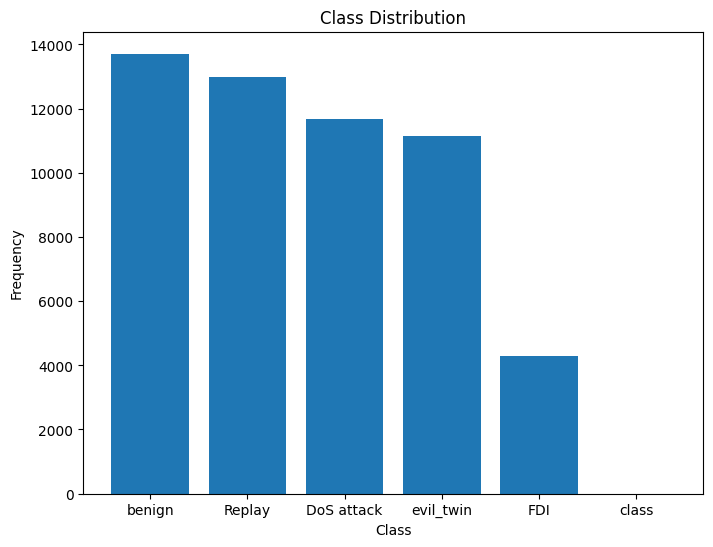


Imbalanced Classes:
class
class    0.001859
Name: count, dtype: float64

The dataset shows class imbalance.


In [249]:

class_counts = df['class'].value_counts()

# Print class frequencies
print("Class Frequencies:")
print(class_counts)

# Calculate class percentages
class_percentages = (class_counts / len(df)) * 100

# Print class percentages
print("\nClass Percentages:")
print(class_percentages)

# Visualize class distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Check for class imbalance (e.g., if any class percentage is below a threshold)
imbalance_threshold = 5  # Example threshold: 5%
imbalanced_classes = class_percentages[class_percentages < imbalance_threshold]

if not imbalanced_classes.empty:
    print("\nImbalanced Classes:")
    print(imbalanced_classes)
    print("\nThe dataset shows class imbalance.")
else:
    print("\nNo significant class imbalance detected.")

In [250]:

# df.dropna(inplace=True)

In [251]:

class_distribution = df['class'].value_counts()
class_distribution


,count
class,
benign,13715
Replay,12979
DoS attack,11671
evil_twin,11156
FDI,4280
class,1


In [252]:


df = df[df['class'] != 5]

class_counts_after_drop = df['class'].value_counts()


print("Class Frequencies After Dropping Class 1:")
print(class_counts_after_drop)


class_percentages_after_drop = (class_counts_after_drop / len(df)) * 100


print("\nClass Percentages After Dropping Class 1:")
class_percentages_after_drop

Class Frequencies After Dropping Class 1:
class
benign        13715
Replay        12979
DoS attack    11671
evil_twin     11156
FDI            4280
class             1
Name: count, dtype: int64

Class Percentages After Dropping Class 1:


,count
class,
benign,25.491617
Replay,24.123639
DoS attack,21.692502
evil_twin,20.735289
FDI,7.955095
class,0.001859


In [253]:
df = df[df['class'] != 'class']



In [254]:

# df['class'] = df['class'].astype(str).str.replace('class', 'other', regex=False)

# Display updated class column to verify changes
print(df['class'].unique())

['benign' 'DoS attack' 'Replay' 'evil_twin' 'FDI']


In [255]:
df.shape

(53801, 100)

In [256]:
df.head()

,frame.number,frame.len,frame.protocols,wlan.duration,wlan.ra,wlan.ta,wlan.da,wlan.sa,wlan.bssid,wlan.frag,...,mroll,myaw,est_x,est_y,cntl_x,cntl_y,residual1,residual2,residual3,residual4
0,60.0,24.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,34.0,178.0,27.093632,21.688407,20.456856,24.652533,-11.367567,-10.829897,-0.239502,-0.675007
1,61.0,24.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,34.0,178.0,27.093632,21.688407,20.456856,24.652533,-11.367567,-10.829897,-0.239502,-0.675007
2,75.0,104.0,0.0,0.0,4.0,1.0,4.0,1.0,0.0,0.0,...,34.0,178.0,27.093632,21.688407,20.456856,24.652533,-11.367567,-10.829897,-0.239502,-0.675007
3,122.0,86.0,2.0,44.0,1.0,0.0,1.0,0.0,0.0,0.0,...,34.0,178.0,27.093632,21.688407,20.456856,24.652533,-11.367567,-10.829897,-0.239502,-0.675007
4,124.0,26.0,0.0,60.0,1.0,0.0,1.0,0.0,0.0,0.0,...,34.0,178.0,27.093632,21.688407,20.456856,24.652533,-11.367567,-10.829897,-0.239502,-0.675007


In [257]:
for i in range(0, len(df.columns), 20):  # Adjust chunk size as needed
    print(df.isnull().sum().iloc[i:i+20])


frame.number       0
frame.len          0
frame.protocols    0
wlan.duration      0
wlan.ra            0
wlan.ta            0
wlan.da            0
wlan.sa            0
wlan.bssid         0
wlan.frag          0
wlan.seq           0
llc.type           0
ip.hdr_len         0
ip.len             0
ip.id              0
ip.flags           0
ip.ttl             0
ip.proto           0
ip.src             0
ip.dst             0
dtype: int64
tcp.srcport               0
tcp.dstport               0
tcp.seq_raw               0
tcp.ack_raw               0
tcp.hdr_len               0
tcp.flags                 0
tcp.window_size           0
tcp.options               0
udp.srcport               0
udp.dstport               0
udp.length                0
data.data                 0
data.len                  0
wlan.fc.type              0
wlan.fc.subtype           0
time_since_last_packet    0
class                     0
height                    0
x_speed                   0
y_speed                   0
dtype: 

In [258]:
# List of columns to fill with the value 46101
columns_to_fill = [
    'mid', 'x', 'y', 'z', 'vgx', 'vgy', 'vgz', 'templ', 'temph', 'tof',
    'h', 'bat', 'baro', 'time', 'agx', 'agy', 'agz', 'mpitch', 'mroll',
    'myaw', 'est_x', 'est_y', 'cntl_x', 'cntl_y', 'residual1', 'residual2',
    'residual3', 'residual4'
]

# Fill missing values in these specific columns with 46101
df[columns_to_fill] = df[columns_to_fill].fillna(46101)

# Verify the changes
print("After filling specific columns with 46101:")
print(df[columns_to_fill].isnull().sum())  # Check if any NaN values remain in the specified columns


After filling specific columns with 46101:
mid          0
x            0
y            0
z            0
vgx          0
vgy          0
vgz          0
templ        0
temph        0
tof          0
h            0
bat          0
baro         0
time         0
agx          0
agy          0
agz          0
mpitch       0
mroll        0
myaw         0
est_x        0
est_y        0
cntl_x       0
cntl_y       0
residual1    0
residual2    0
residual3    0
residual4    0
dtype: int64


In [259]:
df.shape

(53801, 100)

In [260]:

# Count the occurrences of 'nan' (as a string) in the 'class' column
nan_string_count = df['class'].astype(str).str.contains('nan').sum()

print(f"Number of 'nan' (as string) in 'class' column: {nan_string_count}")

Number of 'nan' (as string) in 'class' column: 0


In [261]:

df['class'] = df['class'].astype(str).str.replace('nan', 'other')

In [262]:

# Count the occurrences of 'nan' (as a string) in the 'class' column
nan_string_count = df['class'].astype(str).str.contains('nan').sum()

print(f"Number of 'nan' (as string) in 'class' column: {nan_string_count}")

Number of 'nan' (as string) in 'class' column: 0


In [263]:

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the 'class' column
df['class'] = le.fit_transform(df['class'])

# Display the updated DataFrame
print(df.head())
print(df['class'].unique())

   frame.number  frame.len  frame.protocols  wlan.duration  wlan.ra  wlan.ta  \
0          60.0       24.0              0.0            0.0      1.0      1.0   
1          61.0       24.0              0.0            0.0      1.0      1.0   
2          75.0      104.0              0.0            0.0      4.0      1.0   
3         122.0       86.0              2.0           44.0      1.0      0.0   
4         124.0       26.0              0.0           60.0      1.0      0.0   

   wlan.da  wlan.sa  wlan.bssid  wlan.frag  ...  mroll   myaw      est_x  \
0      1.0      1.0         0.0        0.0  ...   34.0  178.0  27.093632   
1      1.0      1.0         0.0        0.0  ...   34.0  178.0  27.093632   
2      4.0      1.0         0.0        0.0  ...   34.0  178.0  27.093632   
3      1.0      0.0         0.0        0.0  ...   34.0  178.0  27.093632   
4      1.0      0.0         0.0        0.0  ...   34.0  178.0  27.093632   

       est_y     cntl_x     cntl_y  residual1  residual2  resi

In [264]:
from sklearn.model_selection import KFold

X = df.drop('class', axis=1)
y = df['class']

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"\nFold {fold + 1}")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print("X_train shape:", X_train.shape)
    print("y_train shape:", y_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_test shape:", y_test.shape)



Fold 1
X_train shape: (43040, 99)
y_train shape: (43040,)
X_test shape: (10761, 99)
y_test shape: (10761,)

Fold 2
X_train shape: (43041, 99)
y_train shape: (43041,)
X_test shape: (10760, 99)
y_test shape: (10760,)

Fold 3
X_train shape: (43041, 99)
y_train shape: (43041,)
X_test shape: (10760, 99)
y_test shape: (10760,)

Fold 4
X_train shape: (43041, 99)
y_train shape: (43041,)
X_test shape: (10760, 99)
y_test shape: (10760,)

Fold 5
X_train shape: (43041, 99)
y_train shape: (43041,)
X_test shape: (10760, 99)
y_test shape: (10760,)


In [265]:
# from sklearn.model_selection import train_test_split


# X = df.drop('class', axis=1)  # Features (all columns except 'class')
# y = df['class']  # Target variable ('class' column)

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_test shape:", y_test.shape)

In [266]:
y.unique()

array([3, 0, 2, 4, 1])

In [267]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)  # Increased max_iter
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.4095724907063197

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.50      0.52      2385
           1       0.44      0.04      0.07       858
           2       0.17      0.23      0.20      2608
           3       0.54      0.61      0.57      2737
           4       0.47      0.43      0.45      2172

    accuracy                           0.41     10760
   macro avg       0.43      0.36      0.36     10760
weighted avg       0.43      0.41      0.40     10760


Confusion Matrix:
 [[1188    0  453  458  286]
 [ 125   33  304  201  195]
 [ 848    0  597  644  519]
 [  17    0 1006 1661   53]
 [  13   42 1104   85  928]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [268]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train, X_test, y_train, y_test are already defined from the previous code

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9428438661710037

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89      2385
           1       1.00      1.00      1.00       858
           2       0.93      0.87      0.90      2608
           3       0.94      0.98      0.96      2737
           4       1.00      1.00      1.00      2172

    accuracy                           0.94     10760
   macro avg       0.95      0.95      0.95     10760
weighted avg       0.94      0.94      0.94     10760


Random Forest Confusion Matrix:
 [[2163    0  137   85    0]
 [   0  858    0    0    0]
 [ 269    0 2257   82    0]
 [  18    0   24 2695    0]
 [   0    0    0    0 2172]]


In [269]:


import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X_train, X_test, y_train, y_test are already defined from the previous code

# Create XGBoost DMatrix objects
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
params = {
    'objective': 'multi:softmax',  # For multi-class classification
    'num_class': len(df['class'].unique()), # Number of classes
    'eval_metric': 'merror',  # Evaluation metric (multi-class error rate)
    'eta': 0.1,  # Learning rate
    'max_depth': 6,  # Maximum depth of trees
    'subsample': 0.8,  # Subsample ratio of training instances
    'colsample_bytree': 0.8,  # Subsample ratio of columns when constructing each tree
    'seed': 42 # Random seed for reproducibility
}

# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test set
y_pred_xgb = model.predict(dtest)

# Evaluate the XGBoost model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nXGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nXGBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9024163568773235

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.83      2385
           1       1.00      1.00      1.00       858
           2       0.92      0.71      0.80      2608
           3       0.91      0.99      0.95      2737
           4       1.00      1.00      1.00      2172

    accuracy                           0.90     10760
   macro avg       0.92      0.92      0.92     10760
weighted avg       0.91      0.90      0.90     10760


XGBoost Confusion Matrix:
 [[2118    0  136  131    0]
 [   0  858    0    0    0]
 [ 612    0 1847  149    0]
 [   7    0   15 2715    0]
 [   0    0    0    0 2172]]


In [270]:

!pip install catboost


In [271]:

import catboost as cb

# Assuming X_train, X_test, y_train, y_test are already defined from the previous code

# Initialize CatBoost classifier
catboost_model = cb.CatBoostClassifier(iterations=100,
                                      learning_rate=0.1,
                                      depth=6,
                                      loss_function='MultiClass', # for multiclass classification
                                      random_seed=42,
                                      eval_metric='Accuracy',
                                      verbose=10) # Adjust verbose for logging frequency


# Train the CatBoost model
catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test))

# Make predictions on the test set
y_pred_catboost = catboost_model.predict(X_test)

# Evaluate the CatBoost model
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_catboost))
print("\nCatBoost Classification Report:\n", classification_report(y_test, y_pred_catboost))
print("\nCatBoost Confusion Matrix:\n", confusion_matrix(y_test, y_pred_catboost))

0:	learn: 0.6856486	test: 0.6818773	best: 0.6818773 (0)	total: 94.5ms	remaining: 9.35s
10:	learn: 0.7797449	test: 0.7711896	best: 0.7711896 (10)	total: 966ms	remaining: 7.82s
20:	learn: 0.7998420	test: 0.7901487	best: 0.7901487 (20)	total: 1.8s	remaining: 6.76s
30:	learn: 0.8178946	test: 0.8074349	best: 0.8074349 (30)	total: 2.57s	remaining: 5.73s
40:	learn: 0.8329500	test: 0.8224907	best: 0.8224907 (40)	total: 3.36s	remaining: 4.84s
50:	learn: 0.8354824	test: 0.8253717	best: 0.8253717 (50)	total: 4.12s	remaining: 3.96s
60:	learn: 0.8401059	test: 0.8299257	best: 0.8299257 (59)	total: 4.91s	remaining: 3.14s
70:	learn: 0.8465649	test: 0.8365242	best: 0.8365242 (70)	total: 5.7s	remaining: 2.33s
80:	learn: 0.8540694	test: 0.8422862	best: 0.8422862 (78)	total: 6.5s	remaining: 1.52s
90:	learn: 0.8607142	test: 0.8500000	best: 0.8500929 (89)	total: 7.31s	remaining: 723ms
99:	learn: 0.8652680	test: 0.8551115	best: 0.8551115 (99)	total: 8.06s	remaining: 0us

bestTest = 0.8551115242
bestIteration

In [272]:
!pip install lightgbm

In [273]:


import lightgbm as lgb

# Assuming X_train, X_test, y_train, y_test are already defined

# Create LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set LightGBM parameters
params = {
    'objective': 'multiclass',
    'num_class': len(df['class'].unique()),  # Number of classes
    'metric': 'multi_logloss',  # Use multi_logloss for multi-class
    'boosting_type': 'gbdt',  # Gradient boosting decision tree
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the LightGBM model
num_round = 100
lgbm_model = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Make predictions on the test set
y_pred_lgbm = lgbm_model.predict(X_test, num_iteration=lgbm_model.best_iteration)
y_pred_lgbm = np.argmax(y_pred_lgbm, axis=1)  # Convert probabilities to class labels

# Evaluate the LightGBM model
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("\nLightGBM Classification Report:\n", classification_report(y_test, y_pred_lgbm))
print("\nLightGBM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgbm))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Accuracy: 0.924814126394052

LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      2385
           1       1.00      1.00      1.00       858
           2       0.94      0.79      0.86      2608
           3       0.92      0.99      0.95      2737
           4       1.00      1.00      1.00      2172

    accuracy                           0.92     10760
   macro avg       0.94      0.94      0.94     10760
weighted avg       0.93      0.92      0.92     10760


LightGBM Confusion Matrix:
 [[2127    0  130  128    0]
 [   0  858    0    0    0]
 [ 415    0 2071  122    0]
 [   3    0   11 

In [274]:


import joblib

# Assuming 'model' is your trained XGBoost model
joblib.dump(model, 'xgboost_model.pkl')

# Assuming 'catboost_model' is your trained CatBoost model
joblib.dump(catboost_model, 'catboost_model.pkl')

# Assuming 'lgbm_model' is your trained LightGBM model
joblib.dump(lgbm_model, 'lightgbm_model.pkl')

joblib.dump(logreg, 'logistic_regression_model.pkl')
joblib.dump(rf_classifier, 'random_forest_model.pkl')

print("Models saved successfully!")

Models saved successfully!


In [275]:


import joblib

# Load the saved models
try:
    xgb_model = joblib.load('xgboost_model.pkl')
    print("XGBoost model loaded successfully.")
except FileNotFoundError:
    print("XGBoost model file not found.")

try:
    catboost_model = joblib.load('catboost_model.pkl')
    print("CatBoost model loaded successfully.")
except FileNotFoundError:
    print("CatBoost model file not found.")

try:
    lgbm_model = joblib.load('lightgbm_model.pkl')
    print("LightGBM model loaded successfully.")
except FileNotFoundError:
    print("LightGBM model file not found.")

try:
    logreg_model = joblib.load('logistic_regression_model.pkl')
    print("Logistic Regression model loaded successfully.")
except FileNotFoundError:
    print("Logistic Regression model file not found.")

try:
    rf_model = joblib.load('random_forest_model.pkl')
    print("Random Forest model loaded successfully.")
except FileNotFoundError:
    print("Random Forest model file not found.")

XGBoost model loaded successfully.
CatBoost model loaded successfully.
LightGBM model loaded successfully.
Logistic Regression model loaded successfully.
Random Forest model loaded successfully.


In [276]:


from sklearn.ensemble import BaggingClassifier


bagging_model = BaggingClassifier(n_estimators=10, random_state=42)  # You can adjust n_estimators
bagging_model.fit(X_train, y_train)

# Make predictions
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate the bagging model
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("\nBagging Classification Report:\n", classification_report(y_test, y_pred_bagging))
print("\nBagging Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bagging))



Bagging Accuracy: 0.9628252788104089

Bagging Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      2385
           1       1.00      1.00      1.00       858
           2       0.95      0.92      0.94      2608
           3       0.96      0.98      0.97      2737
           4       1.00      1.00      1.00      2172

    accuracy                           0.96     10760
   macro avg       0.97      0.97      0.97     10760
weighted avg       0.96      0.96      0.96     10760


Bagging Confusion Matrix:
 [[2244    0   84   57    0]
 [   0  858    0    0    0]
 [ 132    0 2407   69    0]
 [  24    0   34 2679    0]
 [   0    0    0    0 2172]]
